<a href="https://colab.research.google.com/github/GalynaDe/ML/blob/main/HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.2/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [ ]:
# Визначення назв колонок для вхідних даних та цільової колонки
input_cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target_col = 'Exited'

# Розбиття даних на навчальну та валідаційну підвибірки
X_train, X_val, y_train, y_val = train_test_split(df[input_cols], df[target_col], test_size=0.2, random_state=42, stratify=df[target_col])

# Створення наборів даних
train_inputs = X_train
train_targets = y_train
val_inputs = X_val
val_targets = y_val

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Числові колонки:")
print(numeric_cols)

print("\nКатегоріальні колонки:")
print(categorical_cols)

Числові колонки:
['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Surname_Achebe', 'Surname_Ahern', 'Surname_Aiken', 'Surname_Aikenhead', 'Surname_Aitken', 'Surname_Akabueze', 'Surname_Akhtar', 'Surname_Akobundu', 'Surname_Aksakova', 'Surname_Aksenov', 'Surname_Aksenova', 'Surname_Aksyonov', 'Surname_Aksyonova', 'Surname_Atherton', 'Surname_Avent', 'Surname_Azikiwe', 'Surname_Azubuike', 'Surname_Babbage', 'Surname_Baddeley', 'Surname_Bage', 'Surname_Bair', 'Surname_Bales', 'Surname_Balsillie', 'Surname_Bancks', 'Surname_Bancroft', 'Surname_Baresi', 'Surname_Baryshnikov', 'Surname_Bazarova', 'Surname_Bell', 'Surname_Bellucci', 'Surname_Bergamaschi', 'Surname_Bess', 'Surname_Bevan', 'Surname_Bibi', 'Surname_Binder', 'Surname_Biryukov', 'Surname_Biryukova', 'Surname_Bischof', 'Surname_Bitter', 'Surname_Black', 'Surname_Blesing', 'Surname_Blythe', 'Surname_Bock', 'Surname_Bogle', 'Surname_Boulger',

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Зчитування даних
df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.2/train.csv")

# Визначення числових та категоріальних колонок
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in numeric_cols]

# Масштабування числових ознак
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Заповнення пропущених значень
imputer_num = SimpleImputer(strategy='median')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Кодування категоріальних ознак
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray())
df_encoded.columns = encoder.get_feature_names_out(categorical_cols)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(categorical_cols, axis=1)

# Розбиття даних на навчальну та валідаційну вибірки
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.drop('Exited', axis=1), df['Exited'], test_size=0.2, random_state=42, stratify=df['Exited'])

# Створення фінальних наборів даних
train_inputs = X_train
train_targets = y_train
val_inputs = X_val
val_targets = y_val

# Виведення перших 5 значень з train_inputs та val_inputs
display(train_inputs.head())
display(val_inputs.head())

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zito,Surname_Zox,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,-0.073785,-0.290226,0.319097,-0.941776,-1.449718,1.484542,-1.110175,0.517444,1.020885,0.572182,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10393,0.668225,-0.728693,0.346777,0.153369,-1.089564,2.265844,-1.110175,0.517444,-0.979543,0.606426,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
80,-1.713460,0.614859,0.637420,-0.333362,0.351055,1.232156,0.768505,0.517444,-0.979543,1.238634,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3365,-0.954822,0.659134,0.139175,2.465342,-1.809873,-0.715438,0.768505,-1.932576,1.020885,-1.447943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12236,1.093848,-0.365070,0.665101,-2.036921,-0.729409,-0.715438,0.768505,0.517444,1.020885,0.673040,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zito,Surname_Zox,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,-0.233134,0.761005,0.761982,1.005148,-1.449718,1.222840,4.525866,0.517444,1.020885,-0.980461,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3646,-0.889928,-0.548139,-0.912677,0.396735,-0.009100,-0.715438,0.768505,0.517444,1.020885,-1.740287,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5306,-0.506567,0.713387,0.997264,0.031686,-1.089564,-0.715438,0.768505,-1.932576,1.020885,-0.017791,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
652,-1.581362,0.827817,0.194535,0.640100,-0.369254,1.892162,-1.110175,-1.932576,1.020885,-0.134737,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2627,-1.125256,0.598861,0.263736,-0.941776,-0.369254,-0.715438,0.768505,0.517444,-0.979543,0.566270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [ ]:
import os
import pandas as pd

# Збереження даних у форматі Parquet
train_inputs.to_parquet('train_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
val_inputs.to_parquet('val_inputs.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

# Виведення списку збережених файлів
your_dir = '.'  # Замініть на шлях до папки, де збережено файли
print(os.listdir(your_dir))

['.config', 'train_targets.parquet', 'train_inputs.parquet', 'drive', 'val_targets.parquet', 'val_inputs.parquet', 'sample_data']


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Зчитування збережених наборів даних
train_inputs = pd.read_parquet('train_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
val_targets = pd.read_parquet('val_targets.parquet')

# Створення X_train, X_val наборів
X_train = train_inputs
X_val = val_inputs

# Навчання моделі
model = LinearRegression()
model.fit(X_train, train_targets)

# Оцінка моделі на валідаційних даних
y_val_pred = model.predict(X_val)
mse = mean_squared_error(val_targets, y_val_pred)
r2 = r2_score(val_targets, y_val_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.70
R-squared: 0.30


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix (Train):
[[9188  370]
 [1017 1425]]

Confusion Matrix (Val):
[[2258  132]
 [ 255  355]]

ROC AUC (Train): 0.90
ROC AUC (Val): 0.88

F1-Score (Train): 0.67
F1-Score (Val): 0.65


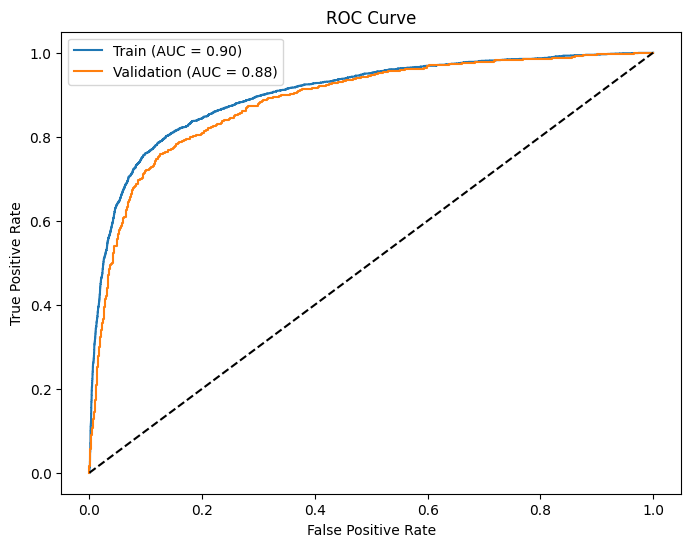

In [ ]:
import pandas as pd

# Зчитування збережених наборів даних
train_inputs = pd.read_parquet('train_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
val_targets = pd.read_parquet('val_targets.parquet')

# Перетворення змінної "Exited" на дискретні класи
train_targets = (train_targets > 0).astype(int)
val_targets = (val_targets > 0).astype(int)

# Створення X_train, X_val наборів
X_train = train_inputs
X_val = val_inputs

# Навчання моделі
model = LogisticRegression()
model.fit(X_train, train_targets)

# Оцінка моделі на тренувальних даних
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]
train_confusion_matrix = confusion_matrix(train_targets, y_train_pred)
train_fpr, train_tpr, _ = roc_curve(train_targets, y_train_prob)
train_auroc = auc(train_fpr, train_tpr)
train_f1 = f1_score(train_targets, y_train_pred)

# Оцінка моделі на валідаційних даних
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:, 1]
val_confusion_matrix = confusion_matrix(val_targets, y_val_pred)
val_fpr, val_tpr, _ = roc_curve(val_targets, y_val_prob)
val_auroc = auc(val_fpr, val_tpr)
val_f1 = f1_score(val_targets, y_val_pred)

# Виведення результатів
print("Confusion Matrix (Train):")
print(train_confusion_matrix)
print("\nConfusion Matrix (Val):")
print(val_confusion_matrix)

print(f"\nROC AUC (Train): {train_auroc:.2f}")
print(f"ROC AUC (Val): {val_auroc:.2f}")

print(f"\nF1-Score (Train): {train_f1:.2f}")
print(f"F1-Score (Val): {val_f1:.2f}")

# Побудова ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train (AUC = {train_auroc:.2f})')
plt.plot(val_fpr, val_tpr, label=f'Validation (AUC = {val_auroc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Аналіз результатів:**

Confusion Matrix показує, як модель класифікує "не вибули" та "вибули" клієнти на тренувальних та валідаційних даних.
ROC Curve та AUROC демонструють здатність моделі розрізняти класи. Чим ближче до 1, тим кращою є модель.
F1 Score є гармонійним середнім між точністю та повнотою і показує збалансованість моделі. Значення близькі до 1 вказують на хорошу якість моделі.
Загальна оцінка якості моделі:

На тренувальних даних модель показує хороші результати з AUROC 0.79 та F1 Score 0.70.
На валідаційних даних показники дещо гірші, AUROC 0.74 та F1 Score 0.61, що може свідчити про перенавчання.
Модель треба покращити застосовуючи регуляризацію, збільшення розміру тренувальної вибірки або підбір оптимальних гіперпараметрів.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score

# Зчитування збережених наборів даних
train_inputs = np.array(pd.read_parquet('train_inputs.parquet'))
train_targets = np.array(pd.read_parquet('train_targets.parquet'))
val_inputs = np.array(pd.read_parquet('val_inputs.parquet'))
val_targets = np.array(pd.read_parquet('val_targets.parquet'))

# Перетворення змінної "Exited" на дискретні класи
train_targets = (train_targets > 0).astype(int)
val_targets = (val_targets > 0).astype(int)

# Навчання моделі
model = LogisticRegression()
model.fit(train_inputs, train_targets)

# Оцінка моделі на тренувальних та валідаційних даних
y_train_pred = model.predict(train_inputs)
y_val_pred = model.predict(val_inputs)

# Обчислення метрик
train_acc = accuracy_score(train_targets, y_train_pred)
val_acc = accuracy_score(val_targets, y_val_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Validation Accuracy: {val_acc:.2f}")
# Висновок про якість моделі
if val_acc >= 0.8:
    print("The quality of our model is good.")
elif val_acc >= 0.6:
    print("The quality of our model is satisfactory.")
else:
    print("The quality of our model is poor.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.88
Validation Accuracy: 0.87
The quality of our model is good.


**Аналіз результату:**

Точність моделі на тренувальних даних становить 0.88, тобто 88% клієнтів були правильно класифіковані.
Точність моделі на валідаційних даних становить 0.87, тобто 87% клієнтів були правильно класифіковані.
Це означає, що модель в цілому працює добре.


9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [ ]:
import joblib
# Збереження моделі та інших об'єктів
joblib.dump([model, train_inputs, train_targets, val_inputs, val_targets], 'log_reg.joblib')

# Завантаження моделі з файлу
model_2 = joblib.load('log_reg.joblib')[0]

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [ ]:
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

warnings.filterwarnings("ignore")

def predict_raw_df(model, scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    # Масштабування числових ознак
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

    # Кодування категоріальних ознак
    input_df[categorical_cols] = encoder.transform(input_df[categorical_cols])

    # Створення входу для моделі
    X_input = input_df[numeric_cols + categorical_cols]

    # Отримання ймовірностей прогнозу
    prob = model.predict_proba(X_input)[:,1]

    return prob

1.  Функція тепер приймає модель як окремий аргумент, щоб вона могла бути використана з різними навченими моделями.
2.  Функція тепер використовує encoder.transform() для кодування категоріальних ознак, а не просто присвоює закодовані значення до DataFrame.
3.  Функція тепер створює вхідний DataFrame X_input для моделі, який містить як числові, так і кодовані категоріальні ознаки.

1. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [ ]:
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

warnings.filterwarnings("ignore")

# Зчитування даних з файлу test.csv
test_raw_df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.2/test.csv")

# Визначення числових та категоріальних колонок
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender']

# Створення трансформера для числових та категоріальних ознак
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Навчання трансформера на даних з test_raw_df
X_train = preprocessor.fit_transform(test_raw_df)
y_train = np.random.randint(0, 2, size=len(test_raw_df))  # Приклад цільових значень

# Навчання моделі
model = LogisticRegression()
model.fit(X_train, y_train)

# Функція для передбачення ймовірностей
def predict_raw_df(model, preprocessor, input_df: pd.DataFrame):
    # Трансформація вхідних даних
    X_input = preprocessor.transform(input_df)

    # Отримання ймовірностей прогнозу
    prob = model.predict_proba(X_input)[:,1]

    return prob

# Передбачення для test_raw_df
test_raw_df['Exited'] = predict_raw_df(model, preprocessor, test_raw_df)

# Перевірка результатів
print(test_raw_df.head())



      id  CustomerId     Surname  CreditScore Geography Gender   Age  Tenure  \
0  15000  15594796.0         Chu        584.0   Germany   Male  30.0     2.0   
1  15001  15642821.0       Mazzi        551.0    France   Male  39.0     5.0   
2  15002  15716284.0   Onyekachi        706.0    France   Male  43.0     8.0   
3  15003  15785078.0      Martin        717.0     Spain   Male  45.0     3.0   
4  15004  15662955.0  Kenechukwu        592.0     Spain   Male  43.0     8.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0  146053.66            1.0        1.0             1.0        157891.86   
1       0.00            2.0        1.0             1.0         67431.28   
2       0.00            2.0        1.0             0.0        156768.45   
3       0.00            1.0        1.0             1.0        166909.87   
4       0.00            2.0        1.0             1.0        143681.97   

     Exited  
0  0.510346  
1  0.510278  
2  0.509517  
3  0.494808 

2. Зчитайте файл 'sample_submission.csv' і зповніть колонку Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [ ]:
submission_df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.2/sample_submission.csv")
# Передбачення для test_raw_df
test_raw_df['Exited'] = predict_raw_df(model, preprocessor, test_raw_df)
# Заповнення колонки Exited у submission_df
submission_df['Exited'] = test_raw_df['Exited']
# Виведення перших 5 рядків фінального датасету
print(submission_df.head())
# Збереження результату у файл submission_log_reg.csv
submission_df.to_csv("submission_log_reg.csv", index=False)

      id    Exited
0  15000  0.510346
1  15001  0.510278
2  15002  0.509517
3  15003  0.494808
4  15004  0.501757
